In [9]:
import pandas as pd

raw_df = pd.read_csv('data/sms_project_data.csv')
raw_df.head()

,Link,Title Screening (Passed or not),Comment on Title Screening (Always needed if excluded),Abstract Screening (Passed or not),Comment on Abstract Screening,Year,KEYWORDS: Topics (Focus Area),CLEAN KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,CLEAN KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
0,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,"Fire Detection, Edge centric",Edgecentric,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
1,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Excluded,Nothing to do with cloud deployment (or edge),NaN,NaN,NaN,NaN,NaN,NaN
2,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Autonomous navigation,Transportation,Evaluation research,Evaluation Research,University
3,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,Fault Detection might be industry application?,Included,NaN,2025.0,"Fault Detection in Cloud Computing, Autonomous...",Cloud Reliability and Resilience,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
4,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2024.0,"Advanced driver assistance systems (ADASs), cl...",Transportation,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University


In [10]:
filtered_df = raw_df[raw_df['Abstract Screening (Passed or not)'] == 'Included']
filtered_df.head()

,Link,Title Screening (Passed or not),Comment on Title Screening (Always needed if excluded),Abstract Screening (Passed or not),Comment on Abstract Screening,Year,KEYWORDS: Topics (Focus Area),CLEAN KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,CLEAN KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
0,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,"Fire Detection, Edge centric",Edgecentric,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
2,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Autonomous navigation,Transportation,Evaluation research,Evaluation Research,University
3,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,Fault Detection might be industry application?,Included,NaN,2025.0,"Fault Detection in Cloud Computing, Autonomous...",Cloud Reliability and Resilience,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
4,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2024.0,"Advanced driver assistance systems (ADASs), cl...",Transportation,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
7,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Large Models as a Service in Industrial IoT,Industrial IoT (IIoT),Survey Research,Survey Research,University


In [11]:
df = filtered_df.iloc[:, -6:]
df.head()

,Year,KEYWORDS: Topics (Focus Area),CLEAN KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,CLEAN KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
0,2025.0,"Fire Detection, Edge centric",Edgecentric,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
2,2025.0,Autonomous navigation,Transportation,Evaluation research,Evaluation Research,University
3,2025.0,"Fault Detection in Cloud Computing, Autonomous...",Cloud Reliability and Resilience,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
4,2024.0,"Advanced driver assistance systems (ADASs), cl...",Transportation,"Solution Proposal, Evaluation Research","Solution Proposal, Validation Research",University
7,2025.0,Large Models as a Service in Industrial IoT,Industrial IoT (IIoT),Survey Research,Survey Research,University


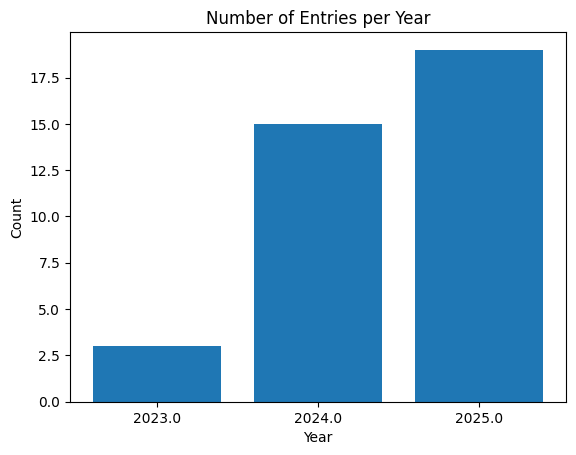

In [12]:
import matplotlib.pyplot as plt

year_counts = df['Year'].value_counts().sort_index()
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Entries per Year')
plt.show()

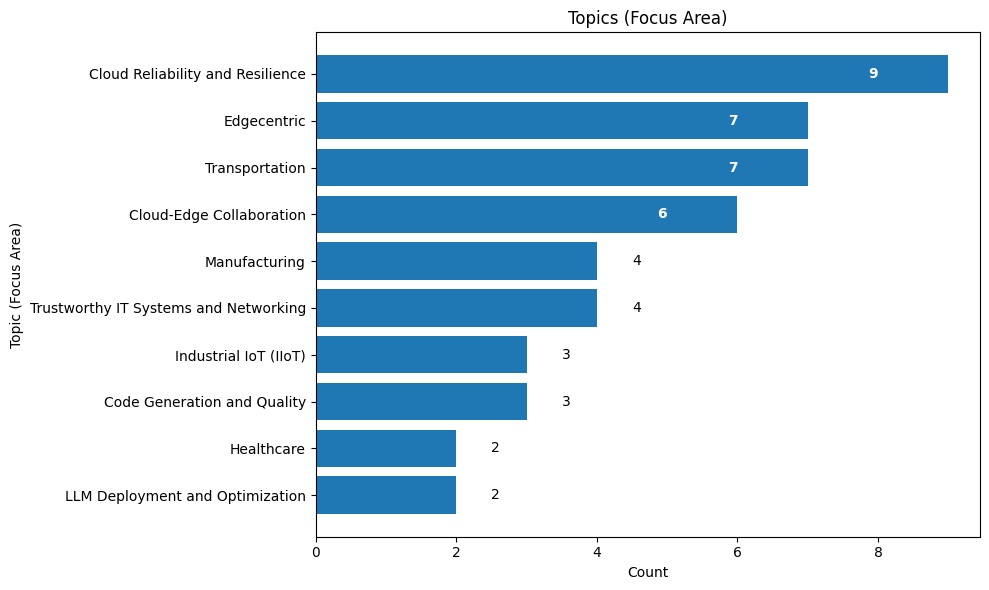

In [13]:
import matplotlib.pyplot as plt

# Split and explode the clean topics
clean_topics_series = df['CLEAN KEYWORDS: Topics (Focus Area)'].str.split(',').explode().str.strip()

# Count each topic
clean_topic_counts = clean_topics_series.value_counts()

# Show only the top 15 topics
top_n = 15
top_clean_topic_counts = clean_topic_counts.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_clean_topic_counts.index[::-1], top_clean_topic_counts.values[::-1])
plt.xlabel('Count')
plt.ylabel('Topic (Focus Area)')
plt.title(f'Topics (Focus Area)')
plt.tight_layout()

# Add value labels inside or just outside the bar
for bar in bars:
    width = bar.get_width()
    if width > 5:
        plt.text(width - 1, bar.get_y() + bar.get_height()/2, int(width),
                 va='center', ha='right', color='white', fontweight='bold')
    else:
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width),
                 va='center', ha='left', color='black')

plt.show()

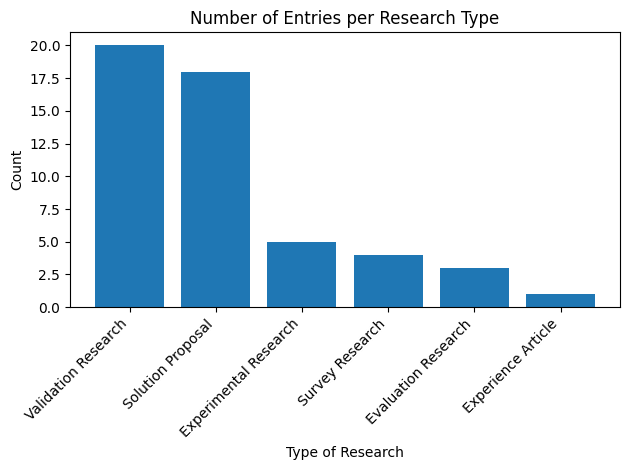

In [14]:
import matplotlib.pyplot as plt

# Split and explode the research types
types_series = df['CLEAN KEYWORDS: Types of research'].str.split(',').explode().str.strip()

# Count each type
type_counts = types_series.value_counts()

# Plot
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type of Research')
plt.ylabel('Count')
plt.title('Number of Entries per Research Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

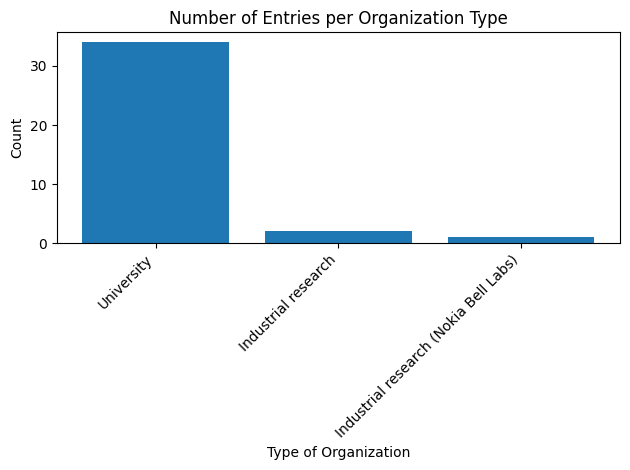

In [15]:
import matplotlib.pyplot as plt

# Split and explode the organization types
org_types_series = df['KEYWORDS: Type of Organization (Determined by association of main researcher)'].str.split(',').explode().str.strip()

# Count each type
org_type_counts = org_types_series.value_counts()

# Plot
plt.bar(org_type_counts.index, org_type_counts.values)
plt.xlabel('Type of Organization')
plt.ylabel('Count')
plt.title('Number of Entries per Organization Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

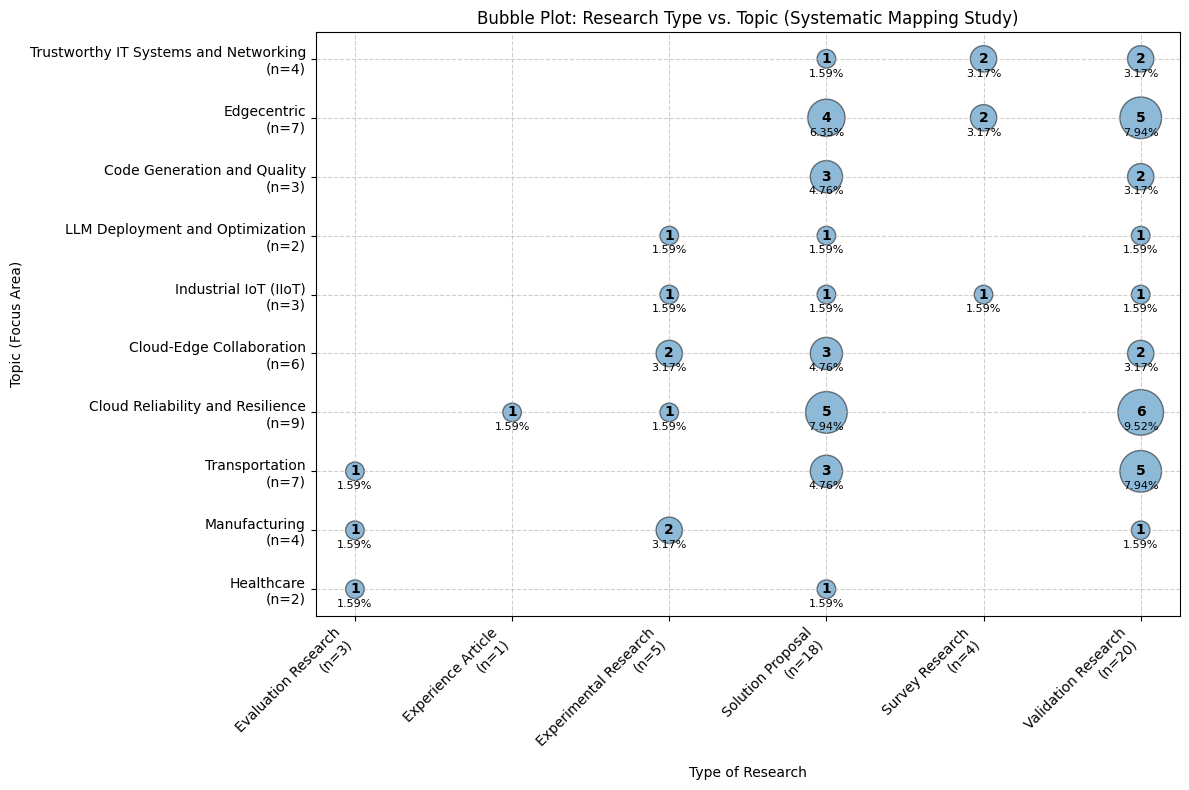

In [16]:
import matplotlib.pyplot as plt

# Calculate total per type and topic (before exploding pairs)
type_totals = df['CLEAN KEYWORDS: Types of research'].str.split(',').explode().str.strip().value_counts()
topic_totals = df['CLEAN KEYWORDS: Topics (Focus Area)'].str.split(',').explode().str.strip().value_counts()

# Prepare exploded pairs as before
df['Type_list'] = df['CLEAN KEYWORDS: Types of research'].str.split(',')
df['Topic_list'] = df['CLEAN KEYWORDS: Topics (Focus Area)'].str.split(',')
exploded_df = df.explode('Type_list').explode('Topic_list')
exploded_df['Type'] = exploded_df['Type_list'].str.strip()
exploded_df['Topic'] = exploded_df['Topic_list'].str.strip()
exploded_df = exploded_df.dropna(subset=['Type', 'Topic'])
pair_counts = exploded_df.groupby(['Type', 'Topic']).size().reset_index(name='Count')

# Filter to top N for clarity
top_types = pair_counts['Type'].value_counts().head(10).index
top_topics = pair_counts['Topic'].value_counts().head(10).index
filtered = pair_counts[pair_counts['Type'].isin(top_types) & pair_counts['Topic'].isin(top_topics)]

# Map types and topics to integer positions for axes
type_order = filtered['Type'].unique()
topic_order = filtered['Topic'].unique()
type_map = {t: i+1 for i, t in enumerate(type_order)}
topic_map = {t: i+1 for i, t in enumerate(topic_order)}

x = filtered['Type'].map(type_map)
y = filtered['Topic'].map(topic_map)
sizes = filtered['Count'] * 180
labels = filtered['Count']
percentages = (filtered['Count'] / filtered['Count'].sum() * 100).round(2)

fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(x, y, s=sizes, alpha=0.5, edgecolors="k")

# Add count labels inside bubbles
for i, label in enumerate(labels):
    ax.text(x.iloc[i], y.iloc[i], str(label), ha='center', va='center', fontsize=10, weight='bold')

# Add percentages below bubbles
for i, pct in enumerate(percentages):
    ax.text(x.iloc[i], y.iloc[i] - 0.25, f"{pct:.2f}%", ha='center', va='center', fontsize=8)

# Add totals to axis labels
xticklabels = [f"{t}\n(n={type_totals[t]})" for t in type_order]
yticklabels = [f"{t}\n(n={topic_totals[t]})" for t in topic_order]

ax.set_xticks(list(type_map.values()))
ax.set_yticks(list(topic_map.values()))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')
ax.set_yticklabels(yticklabels)

ax.set_xlabel('Type of Research')
ax.set_ylabel('Topic (Focus Area)')
ax.set_title('Bubble Plot: Research Type vs. Topic (Systematic Mapping Study)')
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()